### Imports

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
import math
from random import random, sample

### Load dataset

In [5]:
data = np.load("input/olivetti_faces.npy")
target = np.load("input/olivetti_faces_target.npy")

### Dataset information

In [6]:
print("Dataset information")
print(f"Number of images: {data.shape[0]}")  # 400
print(f"Number of unique targets: {len(np.unique(target))}")  # 40
print(f"Image size: {data.shape[1]}x{data.shape[2]}px")  # 64x64
print(f"Pixel color values normalized to [0, 1]. Example: {data[0][0, :4]}")

Dataset information
Number of images: 400
Number of unique targets: 40
Image size: 64x64px
Pixel color values normalized to [0, 1]. Example: [0.30991736 0.3677686  0.41735536 0.44214877]


### Data visualization

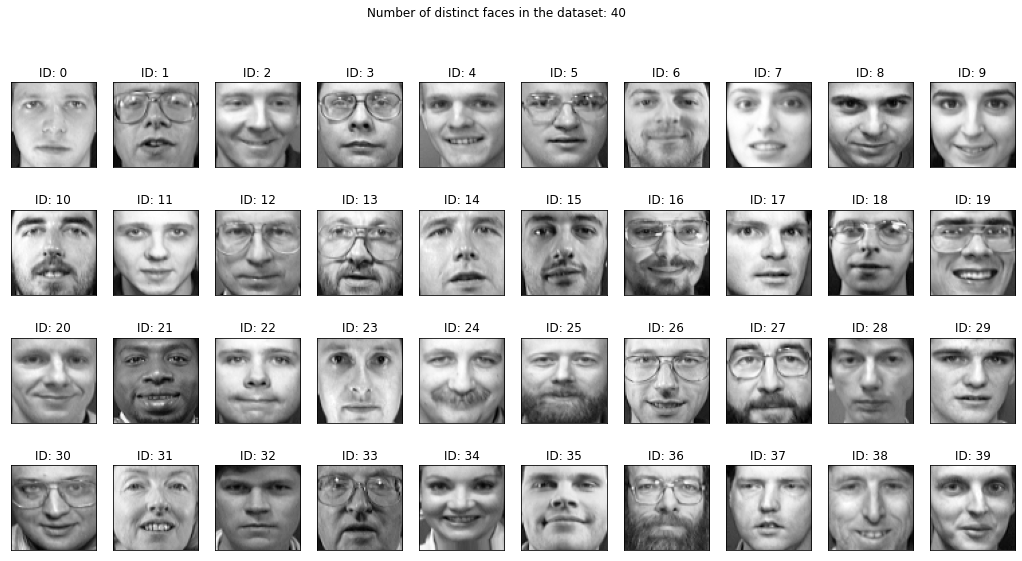

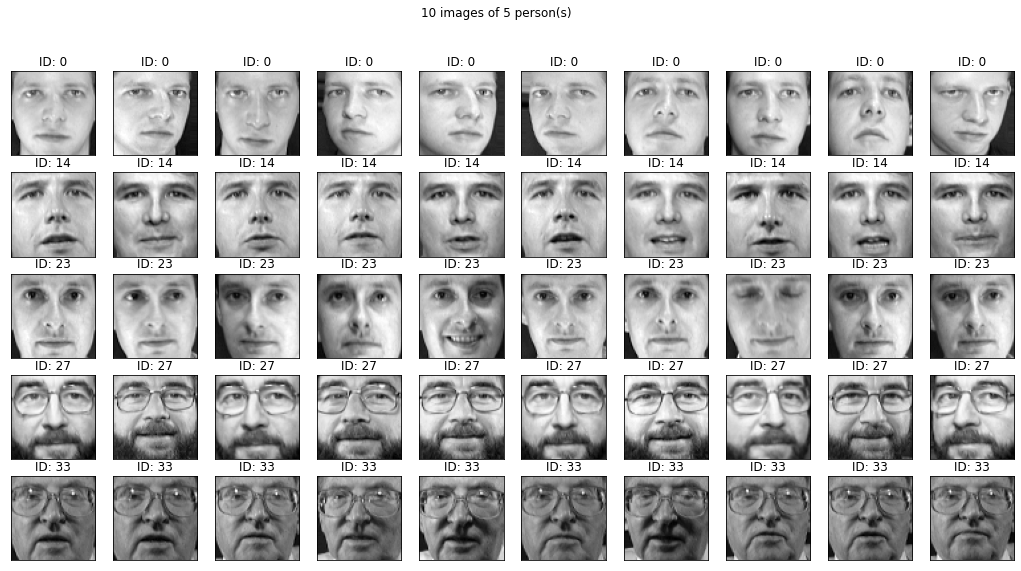

In [55]:
def plot_distinct_faces(data, target, ncols=10, figsize=(18, 9)):
    unique_ids = np.unique(target)
    n_unique = len(unique_ids)
    nrows = math.ceil(n_unique / ncols)
    fig, axarr = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axarr = axarr.flatten()

    for unique_id in unique_ids:
        image_index = unique_id * 10
        axarr[unique_id].imshow(data[image_index], cmap="gray")
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title(f"ID: {unique_id}")
    plt.suptitle(f"Number of distinct faces in the dataset: {n_unique}")


def plot_faces_of_subjects(data, subj_ids, ncols=10, figsize=(18, 9), imgs_per_subj=10):
    nrows = math.ceil(len(subj_ids) * imgs_per_subj / ncols)
    fig, axarr = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

    for i, subj_id in enumerate(subj_ids):
        for j in range(ncols):
            img_idx = subj_id * ncols + j
            axarr[i, j].imshow(data[img_idx], cmap="gray")
            axarr[i, j].set_xticks([])
            axarr[i, j].set_yticks([])
            axarr[i, j].set_title(f"ID: {subj_id}")
    plt.suptitle(f"{imgs_per_subj} images of {len(subj_ids)} person(s)")


plot_distinct_faces(data, target)

unique_ids = np.unique(target).tolist()
n_subjs = min(len(unique_ids), 5)  # Arbitrary, for exemplification purposes
rand_subj_ids = sorted(sample(unique_ids, n_subjs))
plot_faces_of_subjects(data, rand_subj_ids)

### Preprocessing

In [51]:
# Reshape images (matrix to vector)
X = data.reshape((data.shape[0], data.shape[1] * data.shape[2]))
print(f"{X.shape = }")

X.shape = (400, 4096)


### Split data and target into train and test subsets

In [56]:
# stratify makes an equal number of train and test images for each subject
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print(f"{X_train.shape = }")
print(f"{y_train.shape = }")

X_train.shape = (280, 4096)
y_train.shape = (280,)


<AxesSubplot:title={'center':'Number of Samples for Each Classes'}, xlabel='subject ids'>

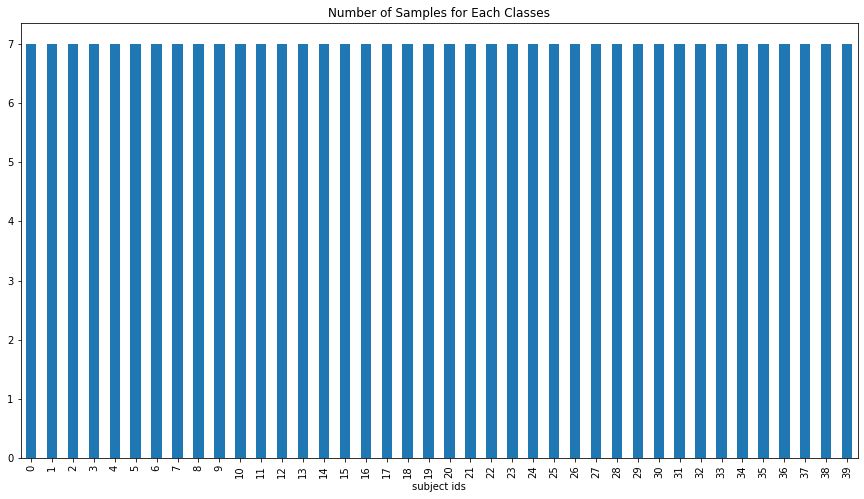

In [57]:
# Verify that each subject has 7 training images
y_frame = pd.DataFrame()
y_frame['subject ids'] = y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15, 8), title="Number of Samples for Each Classes")